In [0]:
# Dependencies

import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.offline as py 
import plotly.graph_objs as go
import plotly.tools as tls 

In [0]:
# Importing Data 

confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")


In [0]:
# Handling None_value 

confirmed_df = confirmed_df.replace(np.nan, "", regex = True)
deaths_df = deaths_df.replace(np.nan, "", regex = True)
recovered_df = recovered_df.replace(np.nan, "", regex = True)
country_df = country_df.replace(np.nan, "", regex = True)


In [0]:
# Worlwide Summary

summary_df = country_df.groupby("Country_Region").agg({"Confirmed" : "sum", "Deaths" : "sum", "Recovered" : "sum", "Active" : "sum"})
worst_hit = summary_df[summary_df.Confirmed == summary_df.Confirmed.max()]
safest = summary_df[summary_df.Confirmed == summary_df.Confirmed.min()]

print(worst_hit)
print("\n")
print(safest)


                Confirmed    Deaths Recovered     Active
Country_Region                                          
US              2048986.0  114669.0    547386  1312426.0


                Confirmed  Deaths Recovered  Active
Country_Region                                     
Lesotho               4.0     0.0         2     2.0


In [0]:
# Chart 1 -> Global Cases + Others till date
total_confirmed = confirmed_df.copy().drop(["Lat", "Long", "Country/Region", "Province/State"], axis = 1).sum()
total_deaths = deaths_df.copy().drop(["Lat", "Long", "Country/Region", "Province/State"], axis = 1).sum()
total_recovered = recovered_df.copy().drop(["Lat", "Long", "Country/Region", "Province/State"], axis = 1).sum()
total_active = pd.Series(data = np.array([x1-x2-x3 for (x1, x2, x3) in zip(total_confirmed.values, total_recovered.values, total_deaths.values)]), 
                        index = total_confirmed.index)

time_df = pd.DataFrame([total_confirmed, total_deaths, total_recovered, total_active]).T
time_df.columns = ["Confirmed", "Deaths", "Recovered", "Active"]

go.Figure(data = go.Scatter(x = total_confirmed.index, y = total_confirmed.values, mode = "lines+markers"))

fig_summary = go.Figure()
fig_summary.add_trace(go.Scatter(x = time_df.index, y = time_df.Confirmed, mode = "lines+markers", name = "Confirmed"))
fig_summary.add_trace(go.Scatter(x = time_df.index, y = time_df.Deaths, mode = "lines+markers", name = "Deaths"))
fig_summary.add_trace(go.Scatter(x = time_df.index, y = time_df.Recovered, mode = "lines+markers", name = "Recovered"))
fig_summary.add_trace(go.Scatter(x = time_df.index, y = time_df.Active, mode = "lines+markers", name = "Active"))

fig_summary.update_layout(title = "Overview of COVID Statistics", xaxis_title ="Date", yaxis_title ="Statistics")
fig_summary.show()


In [0]:
# Chart 2 -> USA Cases + Others till date

total_confirmed_usa = confirmed_df[confirmed_df["Country/Region"] == "US"].drop(["Lat", "Long", "Country/Region", "Province/State"], axis = 1).reset_index(drop = True).sum()
total_deaths_usa = deaths_df[confirmed_df["Country/Region"] == "US"].drop(["Lat", "Long", "Country/Region", "Province/State"], axis = 1).reset_index(drop = True).sum()
total_recovered_usa = recovered_df[confirmed_df["Country/Region"] == "US"].drop(["Lat", "Long", "Country/Region", "Province/State"], axis = 1).reset_index(drop = True).sum()
total_active_usa = pd.Series(data = np.array([x1-x2-x3 for (x1, x2, x3) in zip(total_confirmed_usa.values, total_recovered_usa.values, total_deaths_usa.values)]), 
                        index = total_confirmed_usa.index)

time_df_usa = pd.DataFrame([total_confirmed_usa, total_deaths_usa, total_recovered_usa, total_active_usa]).T
time_df_usa.columns = ["Confirmed", "Deaths", "Recovered", "Active"]

time_df_usa.head


fig_summary_usa = go.Figure()
fig_summary_usa.add_trace(go.Scatter(x = time_df_usa.index, y = time_df_usa.Confirmed, mode = "lines+markers", name = "Confirmed"))
fig_summary_usa.add_trace(go.Scatter(x = time_df_usa.index, y = time_df_usa.Deaths, mode = "lines+markers", name = "Deaths"))
fig_summary_usa.add_trace(go.Scatter(x = time_df_usa.index, y = time_df_usa.Recovered, mode = "lines+markers", name = "Recovered"))
fig_summary_usa.add_trace(go.Scatter(x = time_df_usa.index, y = time_df_usa.Active, mode = "lines+markers", name = "Active"))

fig_summary_usa.update_layout(title = "Overview of COVID Statistics In The USA", xaxis_title ="Date", yaxis_title ="Statistics")
fig_summary_usa.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [0]:
covid_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-28-2020.csv", index_col = "Province_State")
covid_df.Last_Update = pd.to_datetime(covid_df["Last_Update"])                        # Converted Last_Update data to datetime format
covid_df["State Abrr"] = ["AL", "AK", "AS", "AZ", "AR", "CA", "CO", "CT", "DE", " ", "DC", "FL", "GA", " ", "GU", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", 
                          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "MP", "OH", "OK", "OR", "PA", "PR", "RI", "SC", "SD", 
                            "TN", "TX", "UT", "VT", "VI", "VA", "WA", "WV", "WI", "WY", " "]
covid_df["Population"] = [4903185, 731545, 55641, 7278717, 3017825, 39512223, 5758736, 3565287, 973764, 0, 705749, 21477737, 10617423, 0, 165718, 1415872, 1787065, 12671821,
                          6732219, 3155070, 2913314, 4467673, 4648794, 1344212, 6045680, 6892503, 9986857, 5639632, 2976149, 6137428, 1068778, 1934408, 3080156, 1359711, 8882190,
                          2096829, 19453561, 10448084, 762062, 55194, 11689100, 3956971, 4217737, 12801989, 3193694, 1059361, 5148714, 884659, 6829174, 28995881, 3205958, 623989, 104914,
                          8535519, 7614893, 1792147, 5822434, 578759, 0]

In [0]:
# Chart 3 -> Semi Log Figure for rates of growth 

fig_summary_usa.update_layout(title = " ", xaxis_title ="Date", yaxis_title ="Log Value of Abs. No.s", yaxis_type = "log")
fig_summary_usa.add_shape(dict(type="line", x0='3/20/20', y0 = 0.5, x1='3/20/20', y1 = 40000, line=dict(color="RoyalBlue", width=3, dash="dot")))
fig_summary_usa.add_shape(dict(type="line", x0='3/30/20', y0 = 0.5, x1='3/30/20', y1 = 150000, line=dict(color="RoyalBlue", width=3, dash="dot")))
fig_summary_usa.add_shape(dict(type="line", x0='5/5/20', y0 = 0.5, x1='5/5/20', y1 = 980000, line=dict(color="RoyalBlue", width=3, dash="dot")))
fig_summary_usa.show()

In [0]:
drop_rows = ["Diamond Princess", "Grand Princess", "Recovered"]                     # Removing useless rows, such as cruise ships
covid_df = covid_df.drop(drop_rows, axis = 0)

In [0]:
drop_cols = ["UID", "ISO3", "FIPS", "Country_Region", "Lat", "Long_"]               # Removing useless columns, such as province codes
covid_df = covid_df.drop(drop_cols, axis = 1)


In [0]:
'''                                                                    CHOROPLETH BOILERPLATE CODE                                                                              '''

# 1 -> Identifier Label 
covid_df["Label"] = covid_df["State Abrr"] + '<br>' + "Confirmed: " + covid_df["Confirmed"].astype(str) + '<br>' + "Deaths: " + covid_df["Deaths"].astype(str) + '<br>' + "Mortality Rate: " + covid_df["Mortality_Rate"].astype(str)

# 2 -> Data Object 
data_obj = [dict(type = "choropleth", autocolorscale = True, locations = covid_df["State Abrr"], z = covid_df["Active"], locationmode = "USA-states", text = covid_df["Label"], colorbar = dict(title = "Deaths"))]
              
# 3 -> Layout Object
layout_obj = dict(title = "State Vise COVID-19 Statistics", geo = dict(scope = "usa", projection = dict(type = "albers usa"), showlakes = False,),)

# 4 -> Make Plot
choro_plot = dict(data = data_obj, layout = layout_obj)
py.iplot(choro_plot, filename = "COVID_USA_DAILY_CHOROPLOT")

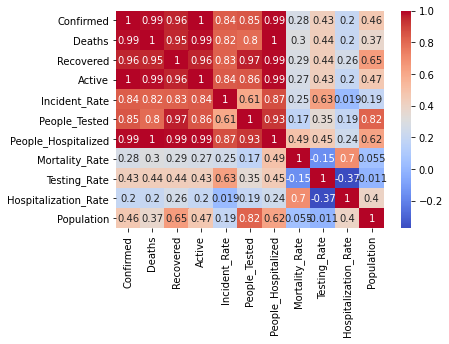

In [0]:
# HeatMap 

htmap = sns.heatmap(covid_df.corr(), cmap = 'coolwarm', annot = True)

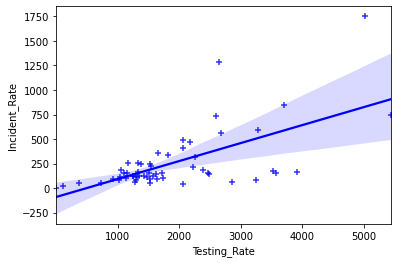

In [0]:
# Some Regression Plots 

fig_tests = sns.regplot(x = covid_df.Testing_Rate, y = covid_df.Incident_Rate, color='blue', marker='+')
# fig_hosprate = sns.regplot(x = covid_df.Hospitalization_Rate, y = covid_df.Incident_Rate, color='red', marker='+')


In [0]:
'''                                                                              PROPHET MODEL                                                                                  '''

'                                                                              PROPHET MODEL                                                                                  '

In [0]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot 

In [0]:
time_df_usa["New"] = time_df_usa["Confirmed"].diff(1)
time_df_usa = time_df_usa.dropna()
time_df_usa.head()

,Confirmed,Deaths,Recovered,Active,New
1/23/20,1,0,0,1,0.0
1/24/20,2,0,0,2,1.0
1/25/20,2,0,0,2,0.0
1/26/20,5,0,0,5,3.0
1/27/20,5,0,0,5,0.0


In [0]:
time_df_usa['cap'] = [310000000] * len(time_df_usa.index)
time_df_usa['floor'] = [0] * len(time_df_usa.index)

time_df_usa                           

,Confirmed,Deaths,Recovered,Active,New,cap,floor
1/23/20,1,0,0,1,0.0,310000000,0
1/24/20,2,0,0,2,1.0,310000000,0
1/25/20,2,0,0,2,0.0,310000000,0
1/26/20,5,0,0,5,3.0,310000000,0
1/27/20,5,0,0,5,0.0,310000000,0
...,...,...,...,...,...,...,...
6/8/20,1961621,111042,518522,1332057,17633.0,310000000,0
6/9/20,1979699,112011,524855,1342833,18078.0,310000000,0
6/10/20,2000702,112938,533504,1354260,21003.0,310000000,0
6/11/20,2023590,113823,540292,1369475,22888.0,310000000,0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                    yhat    yhat_lower    yhat_upper        y        cap  floor
ds                                                                             
2020-01-23      0.367974  -1358.359374   1474.807846      0.0  310000000      0
2020-01-24      0.399790  -1524.535568   1433.469768      1.0  310000000      0
2020-01-25      0.379342  -1396.523927   1370.845877      0.0  310000000      0
2020-01-26      0.320306  -1442.110274   1479.442536      3.0  310000000      0
2020-01-27      0.299670  -1415.616035   1559.738828      0.0  310000000      0
...                  ...           ...           ...      ...        ...    ...
2020-06-08  17381.494157  -8323.090589  41051.823504  17633.0  310000000      0
2020-06-09  17200.942079 -11205.154551  41838.189453  18078.0  310000000      0
2020-06-10  16319.355410 -12409.969396  39730.003683  21003.0  310000000      0
2020-06-11  18809.563869 -16420.156088  47422.798619  22888.0  310000000      0
2020-06-12  20096.840679 -19073.321321  

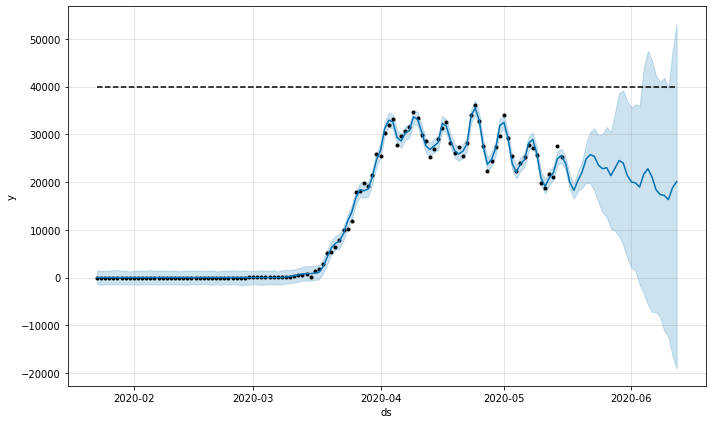

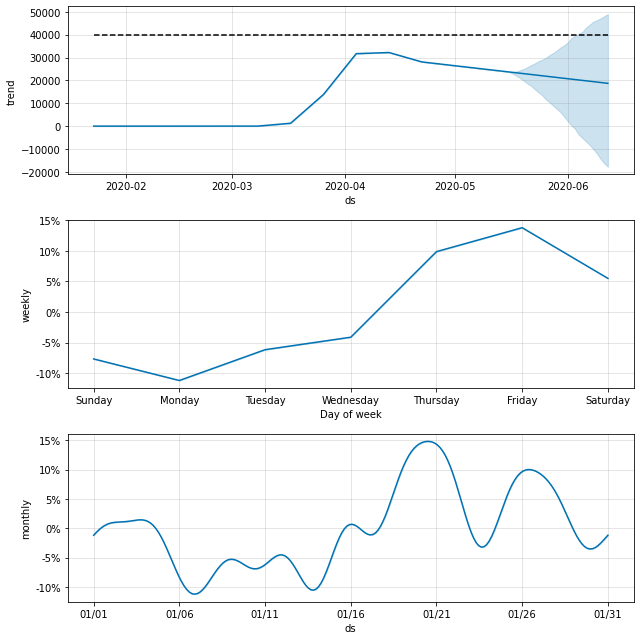

In [0]:
# Confirmed Values
 
# Make a model
confirmed_model = Prophet(growth = 'linear', holidays = None, interval_width = 0.95, n_changepoints = 10, changepoint_prior_scale = 18, seasonality_mode = 'multiplicative', 
                          seasonality_prior_scale = 10)                                                             # Confidence Interval 
confirmed_model.add_seasonality(name = "monthly", period = 30.5, fourier_order = 10, prior_scale = 5)

new_df_usa = pd.DataFrame(time_df_usa["New"])
new_df_usa["Dates"] = pd.to_datetime(new_df_usa.index)
new_df_usa.index = range(len(new_df_usa.index)) 
new_df_usa.columns = ["y", "ds"]

new_df_usa['cap'] = [310000000] * len(new_df_usa.index)
new_df_usa['floor'] = [0] * len(new_df_usa.index)

# Separate intro training and testing data 
test_size = int(0.2 * len(new_df_usa))
training_df = new_df_usa[:-test_size]
testing_data = new_df_usa[-test_size:]

# Training the model
confirmed_model.fit(training_df)                                                                            # Assume there are no seasons for this disease

# Forecasting for the testing period  
confirmed_predics = confirmed_model.make_future_dataframe(periods = test_size)                              # Predict for the testing time limit
confirmed_predics['cap'] = 40000
confirmed_predics['floor'] = 0 
confirmed_predics = confirmed_model.predict(confirmed_predics)

# Getting error metrics 

def make_comp_df(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))    # Join columns

forecast_df = make_comp_df(new_df_usa, confirmed_predics)

print(forecast_df)

# Find MAE value 
def error_calc(df, test_size):

  df = df.copy()
  df["Error"] = df['y'] - df['yhat']
  df["Percentage"] = df["Error"] * 100 / df['y']

  predicted_part = df[-test_size:]
  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return error_mean("Percentage")

print(f"Error is {error_calc(forecast_df, test_size)} %")

# Cleaning results
confirmed_predics_clean = confirmed_predics[["ds", "yhat", "yhat_lower", "yhat_upper"]]
confirmed_predics_clean.columns = ["Date", "Expected", "Lower_Bound", "Upper_Bound"]

# Plotting results 
covid_confirmed_forecast = confirmed_model.plot(confirmed_predics)
covid_component_forecast = confirmed_model.plot_components(confirmed_predics)

True

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,Expected,Lower_Bound,Upper_Bound
167,2020-07-08,24134.184426,12492.272165,35933.968694
168,2020-07-09,26085.881796,13841.525899,37347.636701
169,2020-07-10,26389.533162,14747.425506,37018.494280
170,2020-07-11,24744.101475,13270.977808,36368.634508
171,2020-07-12,22168.610109,10644.193075,33685.007534


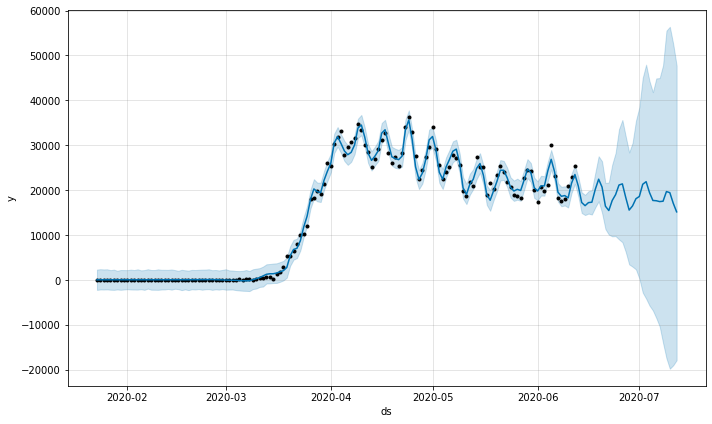

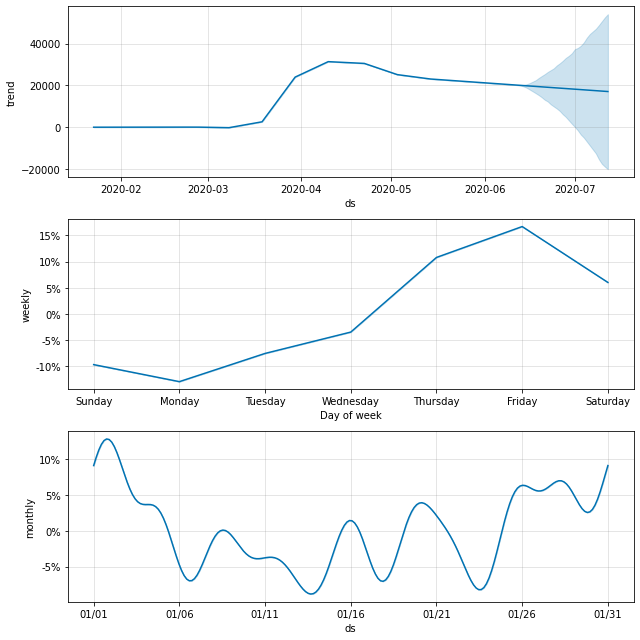

In [0]:
# Error is under 10%, assuming it is acceptable 

final_model = Prophet(growth = 'linear', holidays = None, interval_width = 0.95, n_changepoints = 10, changepoint_prior_scale = 20, seasonality_mode = 'multiplicative', 
                          seasonality_prior_scale = 10)                                                             # Confidence Interval 
final_model.add_seasonality(name = "monthly", period = 30.5, fourier_order = 10, prior_scale = 5)

final_model.fit(new_df_usa)
final_predics = final_model.make_future_dataframe(periods = 30)                              # Predict for the next month
final_predics['cap'] = 40000
final_predics['floor'] = 0 
final_predics = final_model.predict(new_predics)

final_predics_clean = final_predics[["ds", "yhat", "yhat_lower", "yhat_upper"]]
final_predics_clean.columns = ["Date", "Expected", "Lower_Bound", "Upper_Bound"]

next_month_forecast = final_model.plot(final_predics)
next_month_components = final_model.plot_components(final_predics)

new_predics_clean.tail()

In [0]:
'''                                                                      County-by-County Analysis of  

In [0]:
'''                                                                           HYPOTHESIS TESTING                                                                      '''
# Hypotheis -> Increasing testing only works when social distancing is being practiced 

confirmed_ts_usa = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
deaths_ts_usa = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")  

drop_cols = ["UID", "iso3", "code3", "FIPS", "Admin2", "iso2", "Province_State", "Country_Region", "Lat", "Long_", "Combined_Key"]
confirmed_ts_usa = confirmed_ts_usa[confirmed_ts_usa.Province_State == "Wisconsin"].drop(drop_cols, axis = 1)
deaths_ts_usa = deaths_ts_usa[deaths_ts_usa.Province_State == "Wisconsin"].drop(drop_cols, axis = 1).drop("Population", axis = 1)

confirmed_ts_usa = pd.DataFrame(confirmed_ts_usa.sum(axis = 0)).T.rename(index = {0 : "Conf_Cases"})
deaths_ts_usa = pd.DataFrame(deaths_ts_usa.sum(axis = 0)).T.rename(index = {0 : "Died_Cases"})

wisc_ts = pd.concat([confirmed_ts_usa, deaths_ts_usa], axis = 0).T
wisc_ts.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/3/20', '6/4/20', '6/5/20', '6/6/20', '6/7/20', '6/8/20', '6/9/20',
       '6/10/20', '6/11/20', '6/12/20'],
      dtype='object', length=143)

In [0]:
# Include testing rate

testing_rates = {}

date_list = np.array(["04-12-2020","04-13-2020","04-14-2020","04-15-2020","04-16-2020","04-17-2020","04-18-2020","04-19-2020","04-20-2020","04-21-2020","04-22-2020","04-23-2020","04-24-2020",
"04-25-2020","04-26-2020","04-27-2020","04-28-2020","04-29-2020","04-30-2020","05-01-2020","05-02-2020","05-03-2020","05-04-2020","05-05-2020","05-06-2020","05-07-2020",
"05-08-2020","05-09-2020","05-10-2020","05-11-2020","05-12-2020","05-13-2020","05-14-2020","05-15-2020","05-16-2020","05-17-2020","05-18-2020","05-19-2020","05-20-2020",
"05-21-2020","05-22-2020","05-23-2020","05-24-2020","05-25-2020","05-26-2020","05-27-2020","05-28-2020","05-29-2020","05-30-2020","05-31-2020","06-01-2020","06-02-2020",
"06-03-2020","06-04-2020","06-05-2020","06-06-2020","06-07-2020","06-08-2020","06-09-2020","06-10-2020","06-11-2020","06-12-2020"])

In [0]:
for date in date_list:
  country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/" + date + ".csv")
  testing_rates[date] = int((country_df["Testing_Rate"].loc[country_df["Province_State"] == "Wisconsin"]))

In [0]:
# Re-format the dictionary
test_rates = {}
for key, val in testing_rates.items():
  x = key.split("-")
  if x[0][0] is "0":
    x[0] = x[0][1]
  if x[1][0] is "0":
    x[1] = x[1][1]
  x[2] = "20"
  date = "/".join(x) 
  test_rates[date] = val

In [0]:
iter_list = np.linspace(list(test_rates.values())[0], list(test_rates.values())[0], 81)
list_of_testRates = np.concatenate((iter_list, np.array(list(test_rates.values()))))

In [0]:
wisc_ts["Testing_Rate"] = list(list_of_testRates)
wisc_ts["New_Cases"] = wisc_ts["Conf_Cases"].diff(1)
wisc_ts.dropna()

lock_stat = [0]*63 + [1]*50 + [0]*30
wisc_ts["Social_Dist"] = lock_stat

In [0]:
# Split into pre, during and post lockdown time frames

wisc_beforeL = wisc_ts[wisc_ts.index[0] : "3/25/20"]
wisc_duringL = wisc_ts["3/25/20" : "5/13/20"]
wisc_afterL = wisc_ts["5/13/20" : wisc_ts.index[-1]]

len(wisc_ts)

143

In [0]:
# Plot figure during lockdown

fig_summary_states = go.Figure()
fig_summary_states.add_trace(go.Scatter(x = wisc_duringL.index, y = wisc_duringL.New_Cases, mode = "lines+markers", name = "New Cases"))
fig_summary_states.add_trace(go.Scatter(x = wisc_duringL.index, y = wisc_duringL.Died_Cases, mode = "lines+markers", name = "Deaths"))
fig_summary_states.add_trace(go.Scatter(x = wisc_duringL.index, y = wisc_duringL.Testing_Rate, mode = "lines+markers", name = "Tests"))
# fig_summary_states.update_layout(title = "Comparison", xaxis_title ="Date", yaxis_title ="Log Value of Abs. No.s", yaxis_type = "log")
fig_summary_states.show()


In [0]:
# Plot figure during lockdown

fig_summary_states = go.Figure()
fig_summary_states.add_trace(go.Scatter(x = wisc_afterL.index, y = wisc_afterL.New_Cases, mode = "lines+markers", name = "New Cases"))
fig_summary_states.add_trace(go.Scatter(x = wisc_afterL.index, y = wisc_afterL.Died_Cases, mode = "lines+markers", name = "Deaths"))
fig_summary_states.add_trace(go.Scatter(x = wisc_afterL.index, y = wisc_afterL.Testing_Rate, mode = "lines+markers", name = "Tests"))
# fig_summary_states.update_layout(title = "Comparison", xaxis_title ="Date", yaxis_title ="Log Value of Abs. No.s", yaxis_type = "log")
fig_summary_states.show()

In [0]:
'''                                                                      DOES TESTING WORK WITHOUT LOCKDOWN                                                                       '''

(wisc_afterL.iloc[-1].Testing_Rate - wisc_afterL.iloc[0].Testing_Rate) * 100/wisc_afterL.iloc[0].Testing_Rate

177.51718560452892

In [0]:
'''                                                             WISC TIME SERIES ANALYSIS                                                                              '''      
confirmed_ts_usa = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
deaths_ts_usa = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")  

drop_cols = ["UID", "iso3", "code3", "FIPS", "iso2", "Province_State", "Country_Region", "Lat", "Long_", "Combined_Key"]
confirmed_ts_usa = confirmed_ts_usa[confirmed_ts_usa.Province_State == "Wisconsin"].drop(drop_cols, axis = 1)
deaths_ts_usa = deaths_ts_usa[deaths_ts_usa.Province_State == "Wisconsin"].drop(drop_cols, axis = 1).drop("Population", axis = 1)

confirmed_ts_wisc = confirmed_ts_usa.set_index("Admin2").T.drop(["Out of WI", "Unassigned"], axis = 1)
confirmed_ts_wisc

Admin2,Adams,Ashland,Barron,Bayfield,Brown,Buffalo,Burnett,Calumet,Chippewa,Clark,Columbia,Crawford,Dane,Dodge,Door,Douglas,Dunn,Eau Claire,Florence,Fond du Lac,Forest,Grant,Green,Green Lake,Iowa,Iron,Jackson,Jefferson,Juneau,Kenosha,Kewaunee,La Crosse,Lafayette,Langlade,Lincoln,Manitowoc,Marathon,Marinette,Marquette,Menominee,Milwaukee,Monroe,Oconto,Oneida,Outagamie,Ozaukee,Pepin,Pierce,Polk,Portage,Price,Racine,Richland,Rock,Rusk,St. Croix,Sauk,Sawyer,Shawano,Sheboygan,Taylor,Trempealeau,Vernon,Vilas,Walworth,Washburn,Washington,Waukesha,Waupaca,Waushara,Winnebago,Wood
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/8/20,5,3,20,3,2377,6,1,81,59,42,46,26,856,400,39,20,29,124,2,239,33,98,71,23,17,2,20,130,23,1286,36,70,33,8,7,40,64,36,5,3,8900,19,42,13,277,184,1,50,33,35,2,1911,14,707,5,106,83,8,57,114,2,42,21,8,440,3,279,823,58,10,397,11
6/9/20,6,3,20,3,2399,6,1,81,59,45,47,26,871,406,39,20,29,124,2,241,34,99,71,23,16,2,19,134,23,1295,37,77,35,5,7,40,66,37,6,3,8973,19,42,13,289,184,1,51,34,39,2,1939,14,714,5,107,84,9,60,118,2,43,22,8,452,3,281,829,58,13,431,12
6/10/20,6,3,21,3,2405,6,1,81,60,45,49,26,884,410,39,20,29,126,2,247,34,99,71,23,16,2,20,138,23,1308,37,81,36,5,7,40,69,37,7,3,9096,23,42,13,294,185,1,51,36,51,2,1952,14,724,5,108,84,9,60,120,2,44,22,8,456,3,283,842,61,13,457,13
6/11/20,6,3,21,3,2421,7,1,83,61,45,50,26,896,414,39,20,29,126,2,251,34,101,72,23,16,2,22,142,24,1319,37,94,36,6,7,40,70,37,9,4,9220,26,43,14,306,185,1,51,37,66,2,1966,14,729,7,108,84,9,60,129,2,49,23,8,468,3,287,865,63,14,473,15


In [0]:
! pip install pycaret 
from pycaret.utils import enable_colab
enable_colab()

In [0]:
from pycaret.regression import * 
setup_pipeline = setup(confirmed_ts_wisc, target = list(confirmed_ts_wisc.columns)[4], session_id = 122, numeric_features = confirmed_ts_wisc.columns)



SystemExit: ignored